In [2]:
import pandas as pd
from collections import Counter

def create_df(err_file_path):
    words = []
    with open(err_file_path) as f:
        lines = f.read().splitlines()

        for line in lines:
            _, gt_word, _, _, pred_word = line.split()
            words.append((gt_word, pred_word))

    word_counter = Counter(words)

    df = pd.DataFrame.from_dict(word_counter, orient='index', columns=['Count'])
    df[['gt_word', 'pred_word']] = pd.DataFrame(df.index.tolist(), index=df.index)
    df = df.sort_values('Count', ascending=False)
    df = df.reset_index(drop=True)
    df = df[['gt_word', 'pred_word', 'Count']]
    return df

old_df = create_df('word_errors_new.txt')

In [3]:
print(len(set(old_df[old_df.Count >= 5].gt_word.values)))
print(len(set(old_df[old_df.Count >= 4].gt_word.values)))
print(len(set(old_df[old_df.Count >= 3].gt_word.values)))
print(len(set(old_df[old_df.Count >= 2].gt_word.values)))

47
83
183
568


In [4]:
old_df.describe()

,Count
count,9639.000000
mean,1.120656
std,0.632741
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,24.000000


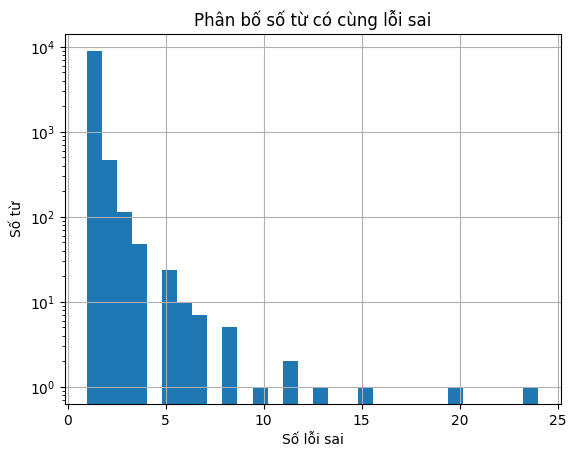

In [9]:
import matplotlib.pyplot as plt

old_df.Count.plot(kind='hist', bins=30)

plt.xlabel("Số lỗi sai")
plt.ylabel("Số từ")
plt.title("Phân bố số từ có cùng lỗi sai")
plt.yscale('log')
plt.grid()
plt.savefig("word_error_VN_histogram.png", dpi=300)

In [6]:
import pandas as pd
from collections import Counter

def create_df(err_file_path):
    words = []
    with open(err_file_path) as f:
        lines = f.read().splitlines()

        for line in lines:
            _, gt_word, _, _, _ = line.split()
            words.append(gt_word)

    counter = Counter(words)

    df = pd.DataFrame(counter.items(), columns=['gt_word', 'Count'])
    df = df.sort_values('Count', ascending=False)
    return df

df = create_df('word_errors_new.txt')

In [7]:
df.describe()

,Count
count,7506.000000
mean,1.439115
std,1.464602
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,34.000000


In [8]:
print(len(df[df.Count >= 10].gt_word.values))
print(len(df[df.Count >= 9].gt_word.values))
print(len(df[df.Count >= 8].gt_word.values))
print(len(df[df.Count >= 7].gt_word.values))
print(len(df[df.Count >= 6].gt_word.values))
print(len(df[df.Count >= 5].gt_word.values))
print(len(df[df.Count >= 4].gt_word.values))
print(len(df[df.Count >= 3].gt_word.values))
print(len(df[df.Count >= 2].gt_word.values))
print(len(df[df.Count >= 1].gt_word.values))

45
56
74
101
149
206
316
551
1589
7506


In [5]:
df.Count.plot(kind='hist', bins=30)
plt.xlabel("Số lỗi sai")
plt.ylabel("Số từ")
plt.grid()
# plt.savefig("word_error_vn_histogram.png", dpi=300)

NameError: name 'df' is not defined